# CNN Using TensorFlow

## Imports

In [0]:
import pathlib
import numpy as np
import IPython.display as display
from PIL import Image
import os

## Import TensorFlow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


## Load Images

Download the trash images from the Github repository

In [0]:
data_dir = tf.keras.utils.get_file(origin='https://github.com/bartomolina/dscapstone/blob/master/data/dataset-resized.zip?raw=true', fname='dataset-resized', extract=True, archive_format='zip')
data_dir = pathlib.Path(data_dir)

In [4]:
data_dir

PosixPath('/root/.keras/datasets/dataset-resized')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

2527

Verify class names

In [6]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])
CLASS_NAMES

array(['paper', 'plastic', 'glass', 'cardboard', 'metal', 'trash'],
      dtype='<U9')

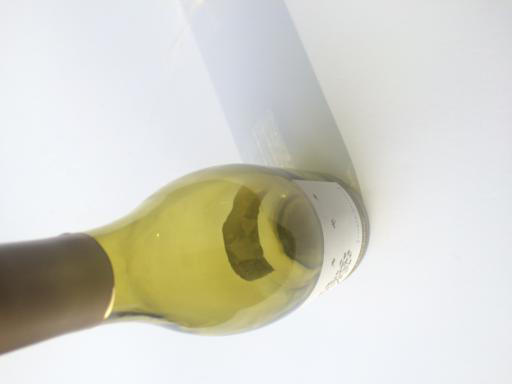

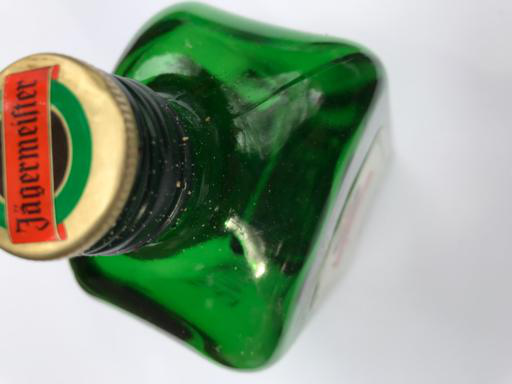

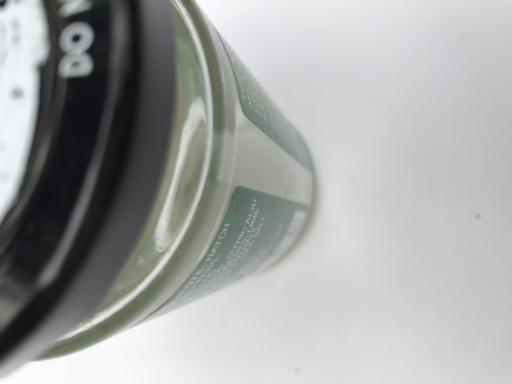

In [7]:
roses = list(data_dir.glob('glass/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

### Loading images with TensorFlow tf.data

We'll create a `tf.data.Dataset` with the file paths:

In [0]:
# define image and batch size
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [0]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [17]:
for f in list_ds.take(5):
  print(f.numpy())

b'/root/.keras/datasets/dataset-resized/trash/trash99.jpg'
b'/root/.keras/datasets/dataset-resized/glass/glass264.jpg'
b'/root/.keras/datasets/dataset-resized/plastic/plastic321.jpg'
b'/root/.keras/datasets/dataset-resized/cardboard/cardboard245.jpg'
b'/root/.keras/datasets/dataset-resized/paper/paper529.jpg'


In [0]:
# gets the class for a given file path
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [0]:
# decode and resize image file
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [0]:
# gets the image and label for a given file
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

Using the helper functions above, we can generate a dataset with all the image, label pairs:

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [30]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [False False False False  True False]
